In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

# Summary

In the notebook `stat_uncertainty_C.ipynb` we extracted the fit uncertainties for both the EDELWEISS measured ionization yield widths and the widths that result from _only_ the inclusion of multiple-scatter events in the nuclear recoil band. 

Since the EDELWEISS measured widths are still significantly larger than those for the multiple-scatter event inclusion, it implies that there is another factor that serves to widen the ionization yield distribution at a given measured recoil energy. We assume that factor is the effective nuclear recoil Fano factor. 

# Extracting the Effective Fano Factor

To extract the effective Fano factor for the nuclear recoils we need to come up with a parameter C$_F$ which is a function of recoil energy and is a corrected version of the measured "widening" parameter C from the EDELWEISS data and the widening parameter C$^{\prime}$ from the effect of multiple-scattering. 

The corrected parameter C$_F$ is assumed to be due to the effective Fano factor for nuclear recoils and is given by:

\begin{equation}
C_F = \sqrt{C^2 - C^{\prime 2}}.
\end{equation}

This parameter can be used to extract the effective Fano factor at a given recoil energy by applying our $\tilde{E}_r$-Q plane model (from `QEr_2D_joint.ipynb`), with an arbitrary Fano factor, until the correct ionization yield (Q) width is obtained (see `Qwidth_confirm.ipynb`). Mathematically this corresponds to adjusting F$_n$ until the following equality is satisfied:

\begin{equation}
\tilde{\sigma}_{Q}^0(E_r;F_n) = \sqrt{\left(\tilde{\sigma}_{Q}^0(E_r)\right)^2 + C_F^2}.
\end{equation}


In [2]:
import h5py

#get Edw fit results for sampling 6 parameters
filename = 'data/systematic_error_fits_corr_corrAB.h5'
#remove vars
f = h5py.File(filename,'r')
#for i in f['mcmc/edwdata_sys_error']:
#    print(i)

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata_sys_error')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
a_yield = np.asarray(f[path+'A'])
b_yield = np.asarray(f[path+'B'])
aH = np.asarray(f[path+'aH'])
scale = np.asarray(f[path+'scale'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigtot = np.asarray(f[path+'Sigss'])
Sigss = np.sqrt(Sigtot**2 - (Cms+slope*xl)**2)

#print(Cms)
#print(samples[0:5,:])
f.close()
#print(np.shape(samples))

470000
(100, 6)


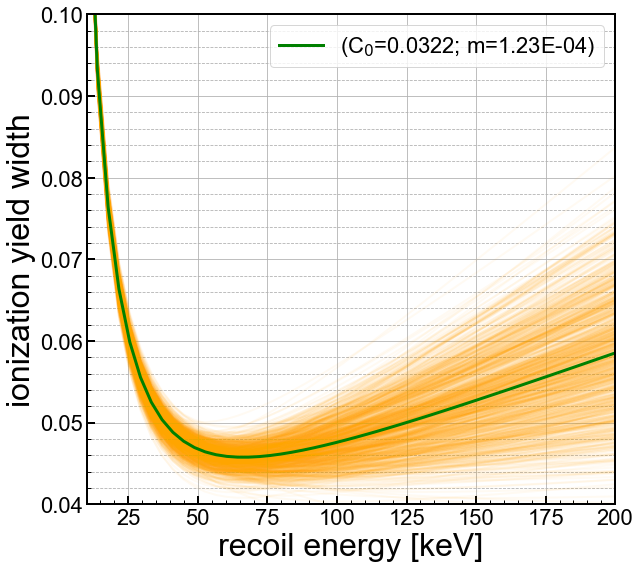

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(len(samples))
print(np.shape(samples[np.random.randint(len(samples), size=100)]))
#for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=1000)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.05)

#ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
#         label='1$\sigma$ fluct.')
#ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
#         label='')

ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

#ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
#         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/EdwyieldWidthFit_Figure2b.eps')
plt.show()


In [4]:
filename = 'data/mcmc_fits.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','multiples')

Cms_m = np.asarray(f[path+'Cms'])
slope_m = np.asarray(f[path+'m'])
samples_m = np.asarray(f[path+'samples'])
sampsize_m = np.asarray(f[path+'sampsize'])
xl_m = np.asarray(f[path+'Er'])
upvec_m = np.asarray(f[path+'Csig_u'])
dnvec_m = np.asarray(f[path+'Csig_l'])
Sigss_m = np.asarray(f[path+'Sigss'])

f.close()
print(np.shape(samples_m))

(40000, 2)


40000


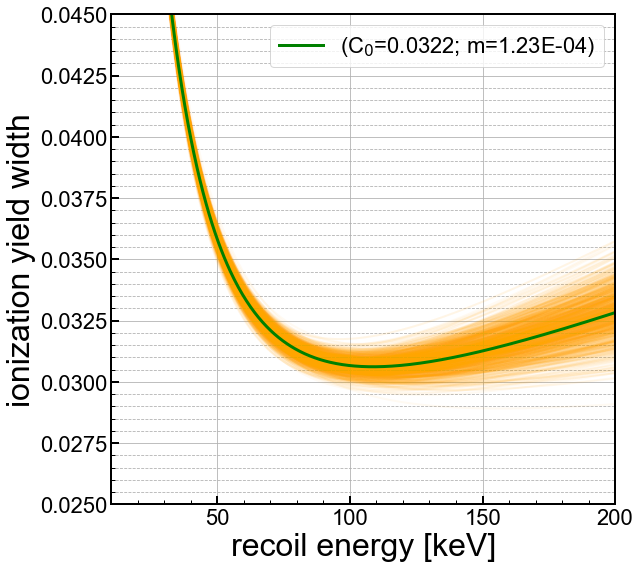

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(len(samples_m))
for Cms_em, m_em in samples_m[np.random.randint(len(samples_m), size=1000)]:
    ax1.plot(xl_m, np.sqrt(Sigss_m**2+(Cms_em+m_em*xl_m)**2), color="orange", alpha=0.05)

#ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
#         label='1$\sigma$ fluct.')
#ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
#         label='')

ax1.plot(xl_m,np.sqrt(Sigss_m**2+(Cms_m+xl_m*slope_m)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#         color='k', marker='o', markersize=4,linestyle='none',label='simulated NR scatters', linewidth=2)

ymin = 0.025
ymax = 0.045



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/MSyieldWidthFit_Figure3b.pdf')
plt.show()

470000
(100, 6)
[[2.15112191e-02 4.04136280e-05]]
[[1.99010917e-02 5.45595130e-05]]
[[2.11714296e-02 3.43655710e-05]]
[[2.28539453e-02 1.67368864e-05]]
[[2.12256151e-02 3.77589929e-05]]
[[2.12979081e-02 3.86917271e-05]]
[[2.06773215e-02 3.86281120e-05]]
[[2.04999480e-02 4.59925874e-05]]
[[2.02809426e-02 4.54217662e-05]]
[[2.08078601e-02 3.91788175e-05]]


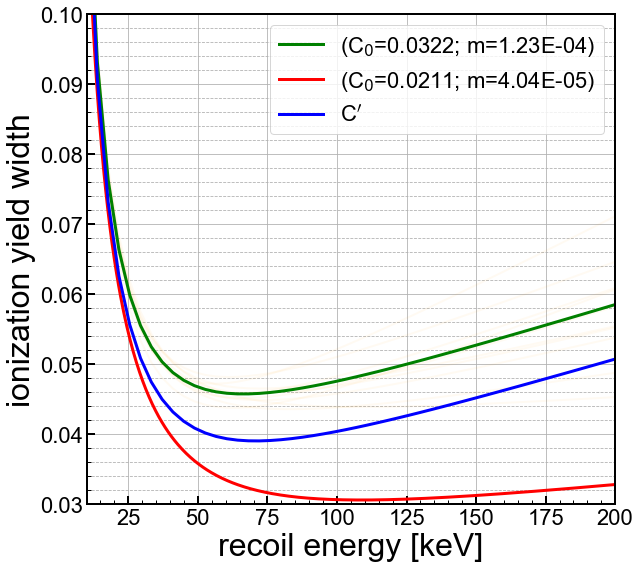

In [20]:
#compute and plot the new C'
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(len(samples))
print(np.shape(samples[np.random.randint(len(samples), size=100)]))
#for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=10)]:
    print(samples_m[np.random.randint(len(samples_m), size=1)])
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.05)

#ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
#         label='1$\sigma$ fluct.')
#ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
#         label='')

ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(xl_m,np.sqrt(Sigss_m**2+(Cms_m+xl_m*slope_m)**2),color='r',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms_m,slope_m))


ax1.plot(xl,np.sqrt(Sigss**2-(Cms_m+xl*slope_m)**2+(Cms+xl*slope)**2),color='b',linestyle="-",linewidth=3, \
         label='C$^\prime$')
#ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
#         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.03
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/EdwyieldWidthFit_Figure2b.eps')
plt.show()

In [ ]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Er, F, 'k-', label='extracted Ge eff. Fano')
ax1.plot (Er, Fup, 'b', label='')
ax1.plot (Er, Fdn, 'b', label='')


blue = '#118DFA'
ax1.fill_between(Er,Fdn,Fup,facecolor=blue,alpha=0.5,label='1$\sigma$ statistical region')


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(10, 200)
ax1.set_ylim(6,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]',**axis_font)
ax1.set_ylabel('effective Fano factor',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [ ]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Er, F, 'k-', label='extracted Ge eff. Fano')
ax1.plot (Er, Fup, 'b', label='')
ax1.plot (Er, Fdn, 'b', label='')


blue = '#118DFA'
ax1.fill_between(Er,Fdn,Fup,facecolor=blue,alpha=0.5,label='1$\sigma$ statistical region')


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(7, 20)
ax1.set_ylim(0,20)
ax1.set_xlabel('recoil energy ($E_r$) [keV]',**axis_font)
ax1.set_ylabel('effective Fano factor',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()